In [1]:
%matplotlib inline
# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')
import re
import csv
import ast
import operator
import pandas as pd
import seaborn as sns
import string
from string import digits
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, LineTokenizer, RegexpTokenizer

from collections import Counter
from matplotlib import cm
from itertools import cycle, islice
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from pandas import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
import numpy as np

### CRoss-Industry Standard Process for Data Mining (CRISP-DM)

#### 1. Data Understanding

In [2]:
reviews = pd.read_csv('TA_restaurants_curated.csv')
print ('Banyak data =', len(reviews))
reviews.head()

Banyak data = 125527


,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
Unnamed: 0           125527 non-null int64
Name                 125527 non-null object
City                 125527 non-null object
Cuisine Style        94176 non-null object
Ranking              115876 non-null float64
Rating               115897 non-null float64
Price Range          77672 non-null object
Number of Reviews    108183 non-null float64
Reviews              115911 non-null object
URL_TA               125527 non-null object
ID_TA                125527 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [4]:
reviews.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [5]:
reviews.isna().sum()

Unnamed: 0               0
Name                     0
City                     0
Cuisine Style        31351
Ranking               9651
Rating                9630
Price Range          47855
Number of Reviews    17344
Reviews               9616
URL_TA                   0
ID_TA                    0
dtype: int64

#### 2. Business Understanding 

1. Bagaimana perkembangan reviews pada setiap restaurant yang terdapat dalam 31 kota?

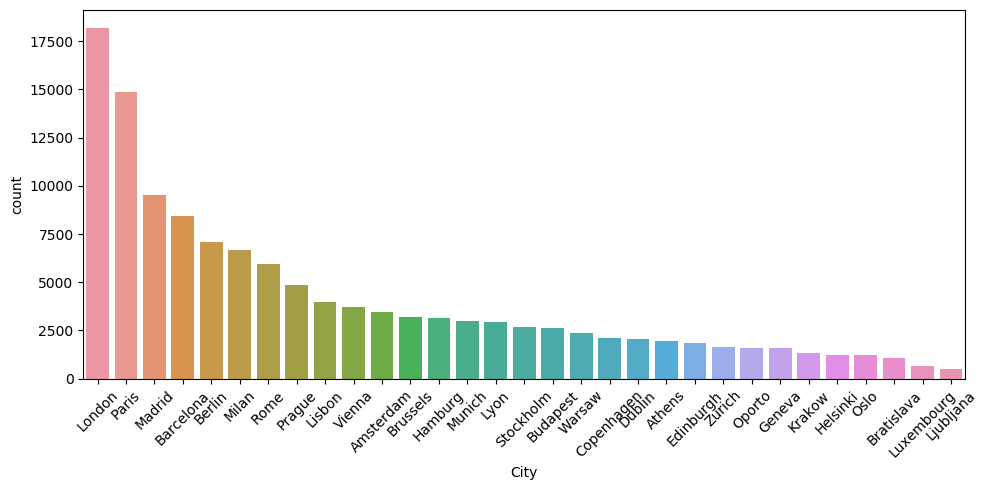

In [6]:
plt.figure(figsize=(10,5), dpi =100)
plot = sns.countplot(reviews['City'], order=reviews['City'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.tight_layout()


London, Paris have the highest number of reviews

Ljubljana, Luxenbourg have the least number of reviews

2. Bagaimana persebaran jumlah restaurants disetiap kota ?

In [7]:
global_number_rest = reviews['City'].value_counts(dropna=False)
print("\n Sorted by number of restaurants \n")
print(global_number_rest)
total_rest = global_number_rest.sum()
print("\n Total number of restaurants: {}".format(total_rest))



 Sorted by number of restaurants 

London        18212
Paris         14874
Madrid         9543
Barcelona      8425
Berlin         7078
Milan          6687
Rome           5949
Prague         4859
Lisbon         3986
Vienna         3724
Amsterdam      3434
Brussels       3204
Hamburg        3131
Munich         2995
Lyon           2930
Stockholm      2705
Budapest       2606
Warsaw         2352
Copenhagen     2109
Dublin         2082
Athens         1938
Edinburgh      1865
Zurich         1667
Oporto         1580
Geneva         1572
Krakow         1354
Helsinki       1228
Oslo           1213
Bratislava     1067
Luxembourg      657
Ljubljana       501
Name: City, dtype: int64

 Total number of restaurants: 125527


Total number of restaurants: 125527 dengan jumlah restaurants paling banyak berada di London dan Paris dan jumlah restaurants paling sedikit berada Ljubljana, Luxenbour

3. Berdasarkan review rating yang diberikan oleh setiap pelanggan bagaimana nilai rata-rata rating di setiap daerah kota ?

In [8]:
byCity = reviews.groupby('City')
byCity['Rating'].mean()

City
Amsterdam     4.118381
Athens        4.207774
Barcelona     3.966829
Berlin        4.127020
Bratislava    3.989314
Brussels      3.890106
Budapest      4.095854
Copenhagen    3.994670
Dublin        4.051151
Edinburgh     4.056818
Geneva        3.969482
Hamburg       4.030508
Helsinki      3.908813
Krakow        4.128812
Lisbon        4.052128
Ljubljana     4.128205
London        3.942896
Luxembourg    3.909310
Lyon          3.920382
Madrid        3.796698
Milan         3.808955
Munich        4.027525
Oporto        4.152145
Oslo          3.899385
Paris         3.948714
Prague        4.013423
Rome          4.232140
Stockholm     3.873528
Vienna        4.067984
Warsaw        4.067102
Zurich        4.018495
Name: Rating, dtype: float64

Hampir semua kota memiliki rating restoran rata-rata baik.

4. Bagaimana persebaran penggunaan Cuisines Style ?

In [9]:
def cuisine_count(_list):
    cuisine_dict = {'UnknownCuisine': 0}
    for cuisines in _list:
        if cuisines is not np.nan:
            cuisines = ast.literal_eval(cuisines)  
            for cuisine in cuisines:  
                if cuisine in cuisine_dict:
                    cuisine_dict[cuisine] += 1
                else :
                    cuisine_dict[cuisine] = 1
        else:
            cuisine_dict['UnknownCuisine'] +=1
    #print(cuisines)
    return(cuisine_dict)

In [10]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}".format(absolute)
def plotCuisine(cui,count,type = 'bar',city=""):
    if type == 'bar':
        fig, axes = plt.subplots(1,1, figsize = (20,10))
    elif type == 'pie':    
        fig, axes = plt.subplots(1,1, figsize = (7,7))
    lists = sorted(cui.items(), key=operator.itemgetter(1),reverse=True)
    x, y = zip(*lists[:count])
    col = cm.inferno_r(np.linspace(.7,.2, len(x)))
    if type == 'bar':
        axes.bar(x,y,color = col)
        axes.set_ylabel('Count')
        axes.set_xlabel('Cuisine')
        axes.set_xticklabels(x,rotation = 90)
    elif type == 'pie':
        axes.pie(y, labels = x, autopct=lambda pct: func(pct, y))
        axes.set_title(city,fontsize=15)
    axes.set_facecolor('lightgrey')


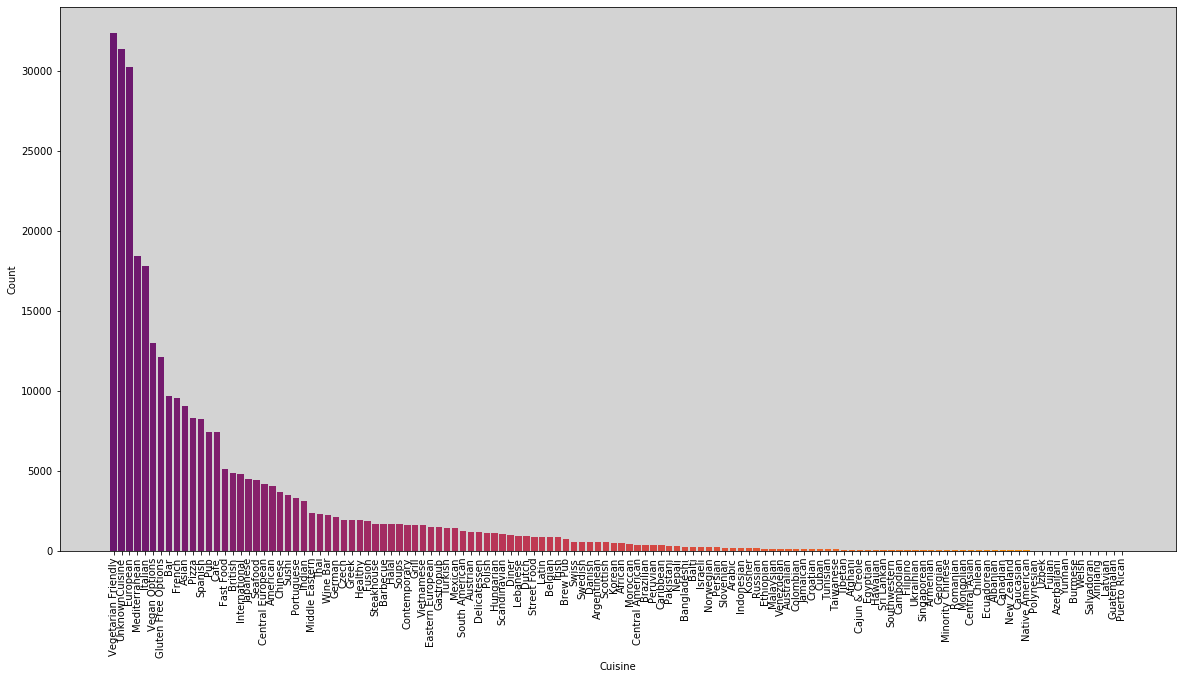

In [11]:
cui = cuisine_count(reviews['Cuisine Style'])
plotCuisine(cui, len(cui))

Vegetarian Friendly Cuisines paling banyak digunakan dalam 31 city pada dataset tersebut.

#### 3. Data Cleaning and Preperation

Lets see if we can remove certain columns & Lets look at the head of dataFrame

In [12]:
reviews.shape

(125527, 11)

#### Drop Null

In [13]:
reviews = reviews.dropna()

In [14]:
reviews.shape

(74225, 11)

In [15]:
data_train, data_test = train_test_split(reviews, test_size=0.2)
data_train_copy = data_train
print("%d items in training data, %d in test data" % (len(data_train), len(data_test)))

59380 items in training data, 14845 in test data


In [16]:
df  = pd.DataFrame(reviews[['City','Rating','Number of Reviews', 'Cuisine Style', 'Reviews']])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74225 entries, 0 to 125445
Data columns (total 5 columns):
City                 74225 non-null object
Rating               74225 non-null float64
Number of Reviews    74225 non-null float64
Cuisine Style        74225 non-null object
Reviews              74225 non-null object
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


In [18]:
df.describe()

,Rating,Number of Reviews
count,74225.000000,74225.000000
mean,4.020478,175.990354
std,0.549149,362.268467
min,1.000000,2.000000
25%,3.500000,25.000000
50%,4.000000,68.000000
75%,4.500000,182.000000
max,5.000000,16478.000000


In [19]:
df['Reviews'].head(20)

0     [['Just like home', 'A Warm Welcome to Wintry ...
1     [['Great food and staff', 'just perfect'], ['0...
2     [['Satisfaction', 'Delicious old school restau...
3     [['True five star dinner', 'A superb evening o...
4     [['Best meal.... EVER', 'super food experience...
5     [['A treat!', 'Wow just Wow'], ['01/01/2018', ...
6     [['40th Birthday with my Family', 'One of the ...
7     [['Great Experience', 'A true delight'], ['01/...
8     [['Great Food & Service!', 'Superior food and ...
9     [['Excellent Herring', 'Lovely, rustic fish sh...
10    [['Simply AMAZING!', 'Delicious Burgers'], ['0...
11    [['A hidden gem', 'Fantastic!'], ['01/06/2018'...
12    [['Love it!', 'As pure as Paradise: Adam!'], [...
13    [['Awesome little pub', 'An amazing little pla...
14    [['Best meal of our trip', 'It was like fallin...
15    [['So. Much. Food', 'Hidden Gem'], ['01/10/201...
16    [['Brunch', 'Worth the wait!'], ['01/09/2018',...
17    [['Wonderful Christmas dinner', 'Fantastic

#### Remove Punctuation

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Cuisine Style_Punct'] = df['Cuisine Style'].apply(lambda x: remove_punct(x))
df['Reviews_Punct'] = df['Reviews'].apply(lambda x: remove_punct(x))
df.head(10)

,City,Rating,Number of Reviews,Cuisine Style,Reviews,Cuisine Style_Punct,Reviews_Punct
0,Amsterdam,5.0,136.0,"['French', 'Dutch', 'European']","[['Just like home', 'A Warm Welcome to Wintry ...",French Dutch European,Just like home A Warm Welcome to Wintry Amster...
1,Amsterdam,4.5,812.0,"['Dutch', 'European', 'Vegetarian Friendly', '...","[['Great food and staff', 'just perfect'], ['0...",Dutch European Vegetarian Friendly Gluten Free...,Great food and staff just perfect
2,Amsterdam,4.5,567.0,"['Mediterranean', 'French', 'International', '...","[['Satisfaction', 'Delicious old school restau...",Mediterranean French International European Ve...,Satisfaction Delicious old school restaurant
3,Amsterdam,5.0,564.0,"['French', 'European', 'International', 'Conte...","[['True five star dinner', 'A superb evening o...",French European International Contemporary Veg...,True five star dinner A superb evening of fine...
4,Amsterdam,4.5,316.0,"['Dutch', 'European', 'International', 'Vegeta...","[['Best meal.... EVER', 'super food experience...",Dutch European International Vegetarian Friend...,Best meal EVER super food experience
5,Amsterdam,4.5,745.0,"['Contemporary', 'International', 'Vegetarian ...","[['A treat!', 'Wow just Wow'], ['01/01/2018', ...",Contemporary International Vegetarian Friendly...,A treat Wow just Wow
6,Amsterdam,4.5,1455.0,"['French', 'International', 'Mediterranean', '...","[['40th Birthday with my Family', 'One of the ...",French International Mediterranean European Ve...,th Birthday with my Family One of the best mea...
7,Amsterdam,4.5,675.0,"['Asian', 'Indonesian', 'Vegetarian Friendly',...","[['Great Experience', 'A true delight'], ['01/...",Asian Indonesian Vegetarian Friendly Vegan Opt...,Great Experience A true delight
8,Amsterdam,4.5,923.0,"['Japanese', 'Asian', 'Vegetarian Friendly', '...","[['Great Food & Service!', 'Superior food and ...",Japanese Asian Vegetarian Friendly Vegan Optio...,Great Food Service Superior food and exciting...
9,Amsterdam,4.5,450.0,"['Dutch', 'Seafood', 'Fast Food']","[['Excellent Herring', 'Lovely, rustic fish sh...",Dutch Seafood Fast Food,Excellent Herring Lovely rustic fish shop in t...


#### Case Folding
Convert text into lower case

In [22]:
df['Reviews_Punct'] = df['Reviews_Punct'].str.lower()
df['Cuisine Style_Punct'] = df['Cuisine Style_Punct'].str.lower()

df.head()

,City,Rating,Number of Reviews,Cuisine Style,Reviews,Cuisine Style_Punct,Reviews_Punct
0,Amsterdam,5.0,136.0,"['French', 'Dutch', 'European']","[['Just like home', 'A Warm Welcome to Wintry ...",french dutch european,just like home a warm welcome to wintry amster...
1,Amsterdam,4.5,812.0,"['Dutch', 'European', 'Vegetarian Friendly', '...","[['Great food and staff', 'just perfect'], ['0...",dutch european vegetarian friendly gluten free...,great food and staff just perfect
2,Amsterdam,4.5,567.0,"['Mediterranean', 'French', 'International', '...","[['Satisfaction', 'Delicious old school restau...",mediterranean french international european ve...,satisfaction delicious old school restaurant
3,Amsterdam,5.0,564.0,"['French', 'European', 'International', 'Conte...","[['True five star dinner', 'A superb evening o...",french european international contemporary veg...,true five star dinner a superb evening of fine...
4,Amsterdam,4.5,316.0,"['Dutch', 'European', 'International', 'Vegeta...","[['Best meal.... EVER', 'super food experience...",dutch european international vegetarian friend...,best meal ever super food experience


#### Stopwords Removing
Remove stopwords from text

In [23]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [24]:
cachedStopWords = set(stopwords.words("english"))
for i in range (len(df)):
    meaningful = df['Reviews_Punct'].iloc[i]
    meaningful = " ".join([word for word in meaningful.split() if word not in cachedStopWords])
    df['Reviews_Punct'].iloc[i]=meaningful
print ('Data trainstop words removing... ')
df.head(20)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Data trainstop words removing... 


,City,Rating,Number of Reviews,Cuisine Style,Reviews,Cuisine Style_Punct,Reviews_Punct
0,Amsterdam,5.0,136.0,"['French', 'Dutch', 'European']","[['Just like home', 'A Warm Welcome to Wintry ...",french dutch european,like home warm welcome wintry amsterdam
1,Amsterdam,4.5,812.0,"['Dutch', 'European', 'Vegetarian Friendly', '...","[['Great food and staff', 'just perfect'], ['0...",dutch european vegetarian friendly gluten free...,great food staff perfect
2,Amsterdam,4.5,567.0,"['Mediterranean', 'French', 'International', '...","[['Satisfaction', 'Delicious old school restau...",mediterranean french international european ve...,satisfaction delicious old school restaurant
3,Amsterdam,5.0,564.0,"['French', 'European', 'International', 'Conte...","[['True five star dinner', 'A superb evening o...",french european international contemporary veg...,true five star dinner superb evening fine dini...
4,Amsterdam,4.5,316.0,"['Dutch', 'European', 'International', 'Vegeta...","[['Best meal.... EVER', 'super food experience...",dutch european international vegetarian friend...,best meal ever super food experience
5,Amsterdam,4.5,745.0,"['Contemporary', 'International', 'Vegetarian ...","[['A treat!', 'Wow just Wow'], ['01/01/2018', ...",contemporary international vegetarian friendly...,treat wow wow
6,Amsterdam,4.5,1455.0,"['French', 'International', 'Mediterranean', '...","[['40th Birthday with my Family', 'One of the ...",french international mediterranean european ve...,th birthday family one best meals ever
7,Amsterdam,4.5,675.0,"['Asian', 'Indonesian', 'Vegetarian Friendly',...","[['Great Experience', 'A true delight'], ['01/...",asian indonesian vegetarian friendly vegan opt...,great experience true delight
8,Amsterdam,4.5,923.0,"['Japanese', 'Asian', 'Vegetarian Friendly', '...","[['Great Food & Service!', 'Superior food and ...",japanese asian vegetarian friendly vegan optio...,great food service superior food exciting sett...
9,Amsterdam,4.5,450.0,"['Dutch', 'Seafood', 'Fast Food']","[['Excellent Herring', 'Lovely, rustic fish sh...",dutch seafood fast food,excellent herring lovely rustic fish shop smack


In [25]:
#save 
df.to_csv("dfReviews.csv")

In [24]:
df = pd.read_csv("train_review1.csv")

#### 4. Training Models

In [25]:
df5_train_target = df["Rating"][:lentrain]
df5_test_target = df["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

NameError: name 'lentrain' is not defined

In [26]:
import nltk
from nltk import word_tokenize

def word_tokenize(text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list
    
def main():
    text = df["Reviews_Punct"]
    print (word_tokenize(text))

if __name__ == '__main__':
    main()

TypeError: expected string or bytes-like object

In [27]:
cluster = df.groupby("Rating")["Reviews_Punct"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("train_review.csv")
cluster1 = pd.read_csv("train_review.csv")

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [29]:
cluster1["Reviews_Punct"][1]

"['awful service nachos doritos', 'really bad experience horrible', 'good bad please take sandwich closest sup', 'scam lovely hotel old worlde', 'beer prices choke expensive tourist trap', 'small portions bad service yet high pric rip betrug', 'ripped place thieves disgusting dinner', 'terrible disgusting kip', 'worst restaurant barcelona absolutely horrendous', 'avoid avoid avoid foget', 'worst ever', 'rip total ripoff', 'terrrible youre reading dont go', 'unpleasant visit disgusting service ever', 'avoid terrible', nan, '“discriminated sit ins horrible', nan, 'la ramblas rip eeeeeeeeeew', 'nice din dins really rude staff terrible', 'stay away go elsewhere basic cheap eats', nan, 'don’t go please € one glass sangria €', 'terrible place remember worst food ever ate', 'dont go way overpriced tourist trap', 'want grab tourist trap lower average food', 'swerve average food expensive drinks', 'avoid nothing special good service', 'bad food fresh terriblepiece junk avoid', 'bad place write 

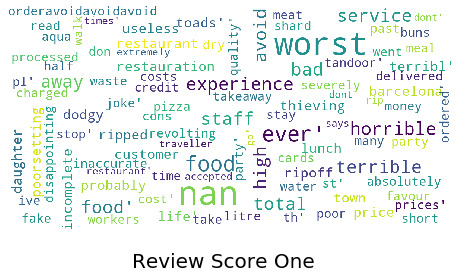

In [30]:
show_wordcloud(cluster1["Reviews_Punct"][0], title = "Review Score One")

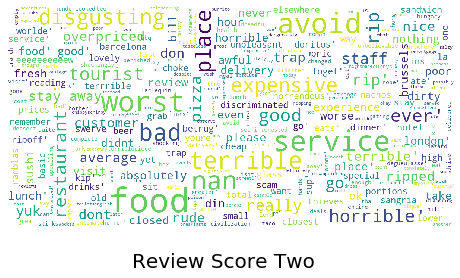

In [31]:
show_wordcloud(cluster1["Reviews_Punct"][1] , title = "Review Score Two")

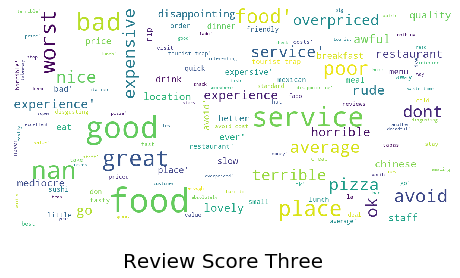

In [32]:
show_wordcloud(cluster1["Reviews_Punct"][2], title = "Review Score Three")

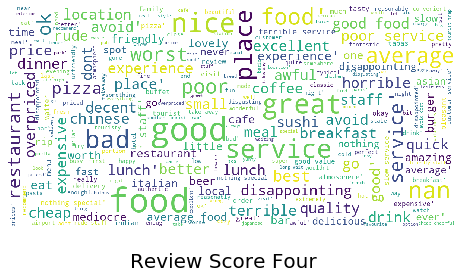

In [33]:
show_wordcloud(cluster1["Reviews_Punct"][3], title = "Review Score Four")

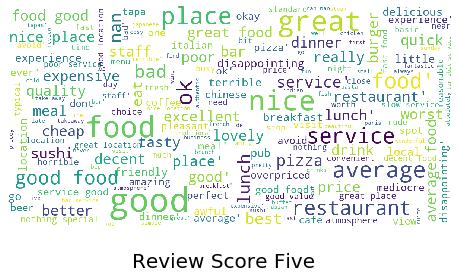

In [34]:
show_wordcloud(cluster1["Reviews_Punct"][4], title = "Review Score Five")

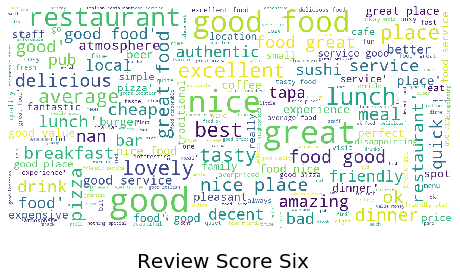

In [35]:
show_wordcloud(cluster1["Reviews_Punct"][5], title = "Review Score Six")

In [36]:
cluster_ = df.groupby("Rating")["Cuisine Style_Punct"].apply(list)
cluster_ = pd.DataFrame(cluster_)
cluster_.to_csv("train_review1.csv")
cluster1_ = pd.read_csv("train_review1.csv")

In [37]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [38]:
cluster1_["Cuisine Style_Punct"][1]

"['spanish', 'italian pizza european', 'european', 'chinese', 'mediterranean spanish', 'mediterranean spanish', 'spanish cafe', 'mediterranean european spanish', 'spanish european', 'spanish', 'japanese sushi asian fusion vegetarian friendly', 'spanish', 'chinese asian', 'spanish', 'spanish', 'mediterranean', 'spanish mediterranean', 'mediterranean', 'cafe', 'mediterranean spanish', 'fast food', 'cafe', 'spanish', 'fast food', 'spanish', 'belgian european', 'belgian seafood european', 'belgian european', 'belgian european', 'french', 'belgian seafood european', 'mexican', 'mexican', 'seafood belgian', 'belgian seafood european', 'italian pizza fast food', 'italian', 'european eastern european hungarian central european', 'fast food', 'italian european hungarian', 'chinese asian japanese sushi', 'mexican', 'fast food', 'fast food british', 'indian', 'seafood', 'european portuguese', 'european portuguese', 'mediterranean portuguese', 'portuguese', 'portuguese', 'italian pizza', 'chinese 

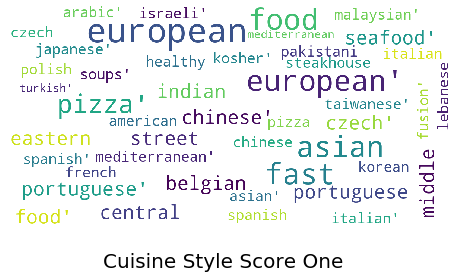

In [39]:
show_wordcloud(cluster1_["Cuisine Style_Punct"][0], title = "Cuisine Style Score One")

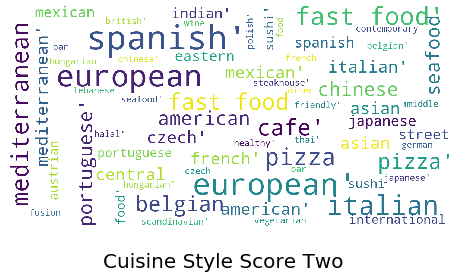

In [40]:
show_wordcloud(cluster1_["Cuisine Style_Punct"][1], title = "Cuisine Style Score Two")

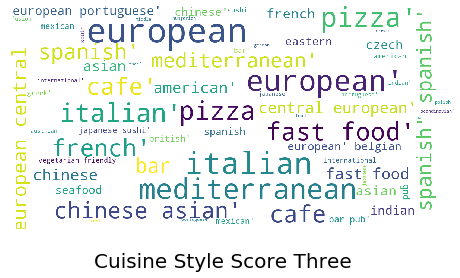

In [41]:
show_wordcloud(cluster1_["Cuisine Style_Punct"][2], title = "Cuisine Style Score Three")

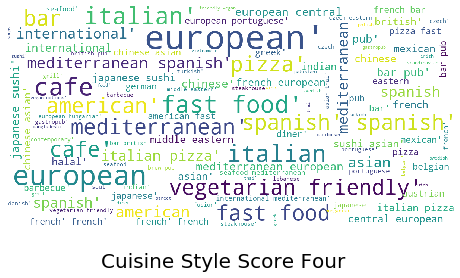

In [42]:
show_wordcloud(cluster1_["Cuisine Style_Punct"][3], title = "Cuisine Style Score Four")

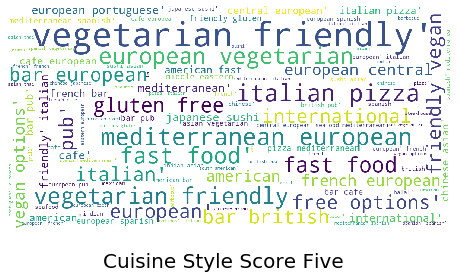

In [43]:
show_wordcloud(cluster1_["Cuisine Style_Punct"][4], title = "Cuisine Style Score Five")

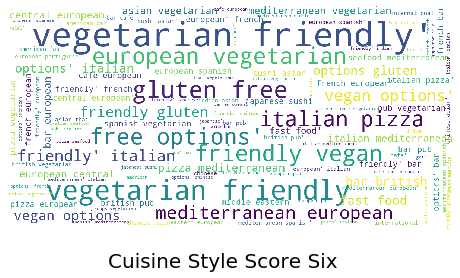

In [44]:
show_wordcloud(cluster1_["Cuisine Style_Punct"][5], title = "Cuisine Style Score Six")